In [1]:
import  tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import glob
import os
from PIL import Image
from tensorflow import keras

In [2]:
import glob

<dtype: 'uint8'>


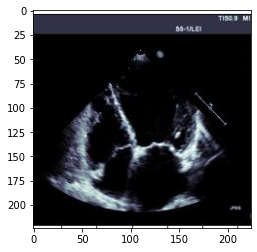

In [3]:
images = tf.io.read_file('./images_dir/100_json_img.png')
images = tf.image.decode_png(images, channels=3)
print(images.dtype)
plt.imshow(images)

(224, 224, 3)
(224, 224, 1)
[0 1 2 3 4]
<dtype: 'uint8'>
(224, 224)


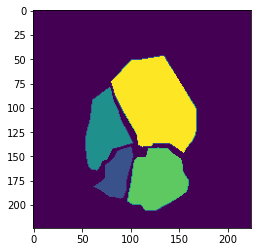

In [4]:
label = tf.io.read_file('./label/100_json_label.png')
label = tf.image.decode_png(label, channels=3)
print(label.shape)
label = tf.image.rgb_to_grayscale(label)
print(label.shape)
print(np.unique(label))
print(label.dtype)
label = np.squeeze(label)
print(label.shape)
plt.imshow(label)

In [5]:
label = tf.io.read_file('./label/100_json_label.png')
label = tf.image.decode_png(label, channels=3)
label = tf.image.rgb_to_grayscale(label)

In [6]:
np.unique(label)

array([0, 1, 2, 3, 4], dtype=uint8)

In [7]:
images = glob.glob('./images_dir/*_json_img.png')
label = glob.glob('./label/*_json_label.png')
len(images), len(label)

(115, 115)

In [8]:
images[:5]

['./images_dir\\1000_json_img.png',
 './images_dir\\1002_json_img.png',
 './images_dir\\1006_json_img.png',
 './images_dir\\100_json_img.png',
 './images_dir\\1011_json_img.png']

In [9]:
label[:5]

['./label\\1000_json_label.png',
 './label\\1002_json_label.png',
 './label\\1006_json_label.png',
 './label\\100_json_label.png',
 './label\\1011_json_label.png']

In [10]:
images.sort()
label.sort()
images[:5]

['./images_dir\\1000_json_img.png',
 './images_dir\\1002_json_img.png',
 './images_dir\\1006_json_img.png',
 './images_dir\\100_json_img.png',
 './images_dir\\1011_json_img.png']

In [11]:
label[:5]

['./label\\1000_json_label.png',
 './label\\1002_json_label.png',
 './label\\1006_json_label.png',
 './label\\100_json_label.png',
 './label\\1011_json_label.png']

In [13]:
dataset = tf.data.Dataset.from_tensor_slices((images, label))
test_num = int(len(images)*0.15)
train_num = len(images) - test_num
train_dataset = dataset.skip(test_num)
test_dataset = dataset.take(test_num)
print(train_num,test_num)

98 17


In [14]:
def decode_images(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.cast(image, tf.float32)
    image = image/127.5 - 1
    return image

def decode_label(path):
    label = tf.io.read_file(path)
    label = tf.image.decode_png(label, channels=3)
    label = tf.image.rgb_to_grayscale(label)
    return label

def image_label_process(image_path, label_path):
    images = decode_images(image_path)
    labels = decode_label(label_path)
    images = tf.image.resize(images, [224,224])
    labels = tf.image.resize(labels, [224,224])
    return images, labels


In [15]:
train_dataset = train_dataset.map(image_label_process)
test_dataset = test_dataset.map(image_label_process)

In [16]:
train_dataset

<MapDataset shapes: ((224, 224, 3), (224, 224, 1)), types: (tf.float32, tf.float32)>

In [17]:
test_dataset

<MapDataset shapes: ((224, 224, 3), (224, 224, 1)), types: (tf.float32, tf.float32)>

In [18]:
train_dataset = train_dataset.repeat().batch(2)
test_dataset = test_dataset.batch(2)

In [19]:
train_dataset

<BatchDataset shapes: ((None, 224, 224, 3), (None, 224, 224, 1)), types: (tf.float32, tf.float32)>

In [51]:
input = tf.keras.layers.Input(shape=(224,224,3))

conv1_1 = tf.keras.layers.Conv2D(64, (3,3),padding = 'same', activation='relu', kernel_initializer = 'he_normal')(input)
conv1_2 = tf.keras.layers.Conv2D(64, (3,3),padding = 'same', activation='relu', kernel_initializer = 'he_normal')(conv1_1)

pool1 = tf.keras.layers.MaxPooling2D(strides=(2,2))(conv1_2)



conv2_1 = tf.keras.layers.Conv2D(128,(3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(pool1)
conv2_2 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(conv2_1)

pool2 = tf.keras.layers.MaxPooling2D(strides=(2,2))(conv2_2)


conv3_1 = tf.keras.layers.Conv2D(256,(3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(pool2)
conv3_2 = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(conv3_1)

pool3 = tf.keras.layers.MaxPooling2D(strides=(2,2))(conv3_2)


conv4_1 = tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(pool3)
conv4_2 = tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(conv4_1)

pool4 = tf.keras.layers.MaxPooling2D(strides=(2,2))(conv4_2)


conv5_1 = tf.keras.layers.Conv2D(1024,(3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(pool4)
conv5_2 = tf.keras.layers.Conv2D(1024, (3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(conv5_1)


up1 = tf.keras.layers.Conv2DTranspose(512, kernel_size=(2,2), strides=(2,2), padding='same',activation='relu', kernel_initializer = 'he_normal')(conv5_2)

add1 = tf.concat([conv4_2, up1],axis=3 )
conv6_1 = tf.keras.layers.Conv2D(512, (3,3), padding='same',  activation='relu', kernel_initializer = 'he_normal')(add1)
conv6_2 = tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(conv6_1)


up2 = tf.keras.layers.Conv2DTranspose(256, kernel_size=(2,2), strides=(2,2), padding='same', kernel_initializer = 'he_normal',
                                      activation='relu')(conv6_2)

add2 = tf.concat([conv3_2, up2],axis=3 )

conv7_1 = tf.keras.layers.Conv2D(256, (3,3), padding='same',  activation='relu', kernel_initializer = 'he_normal')(add2)
conv7_2 = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(conv7_1)

up3 = tf.keras.layers.Conv2DTranspose(128, kernel_size=(2,2), strides=(2,2), padding='same',
                                      activation='relu', kernel_initializer = 'he_normal')(conv7_2)

add3 = tf.concat([conv2_2, up3],axis=3 )

conv8_1 = tf.keras.layers.Conv2D(128, (3,3), padding='same',  activation='relu', kernel_initializer = 'he_normal')(add3)
conv8_2 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(conv8_1)

up4 = tf.keras.layers.Conv2DTranspose(64, kernel_size=(2,2), strides=(2,2), padding='same',
                                      activation='relu', kernel_initializer = 'he_normal')(conv8_2)

add4 = tf.concat([conv1_2, up4],axis=3 )
conv9_1 = tf.keras.layers.Conv2D(64, (3,3), padding='same',  activation='relu', kernel_initializer = 'he_normal')(add4)
conv9_2 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer = 'he_normal')(conv9_1)

out = tf.keras.layers.Conv2D(5, (1,1), padding='same', activation='softmax')(conv9_2)

model = tf.keras.models.Model(inputs=input,
                             outputs=out)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 224, 224, 64) 36928       conv2d_19[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 112, 112, 64) 0           conv2d_20[0][0]                  
_______________________________________________________________________________________

In [52]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.04),
             loss = 'sparse_categorical_crossentropy',
             metrics = 'acc')

In [53]:
logdir = './logs/'
output_model_file = os.path.join(logdir, 'model.h5')

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]  

In [ ]:
history = model.fit(train_dataset, epochs=20,steps_per_epoch=train_num,
         validation_data = test_dataset, validation_steps=test_num, callbacks = callbacks)

Epoch 1/20
98/98 [==============================] - 31s 320ms/step - loss: 1.7311 - acc: 0.7996 - val_loss: 1.6094 - val_acc: 0.8163
Epoch 2/20
98/98 [==============================] - 29s 293ms/step - loss: 1.6094 - acc: 0.8035
Epoch 3/20
57/98 [================>.............] - ETA: 11s - loss: 1.6094 - acc: 0.8037

In [25]:
model.save('unet-97PERCENT.h5')

In [26]:
model = tf.keras.models.load_model('unet-97PERCENT.h5')

In [33]:
test = Image.open('E:/Jupyter/ECHO_CNN/data/train/yjy_a4c/492.jpg')

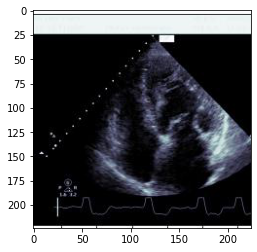

In [34]:
plt.imshow(test)

[0 1 2 3 4]


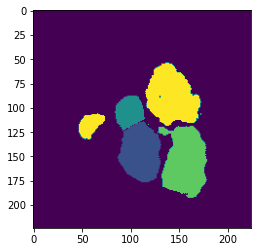

In [36]:
images = np.array(test)
test_part = images/127.5-1
test_part = tf.expand_dims(test_part, axis=0)
pred_part  = model.predict(test_part)
pred_part = tf.argmax(pred_part, axis=-1)
pred_part = tf.squeeze(pred_part)
plt.imshow(pred_part)
print(np.unique(pred_part))

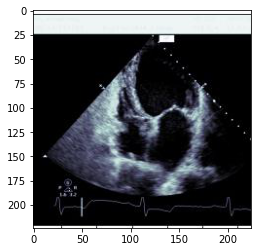

In [37]:
test = Image.open('E:/Jupyter/ECHO_CNN/data/train/yjy_a4c/603.jpg')
plt.imshow(test)

[0 1 2 3 4]


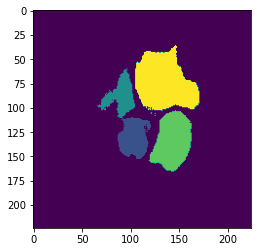

In [38]:
images = np.array(test)
test_part = images/127.5-1
test_part = tf.expand_dims(test_part, axis=0)
pred_part  = model.predict(test_part)
pred_part = tf.argmax(pred_part, axis=-1)
pred_part = tf.squeeze(pred_part)
plt.imshow(pred_part)
print(np.unique(pred_part))

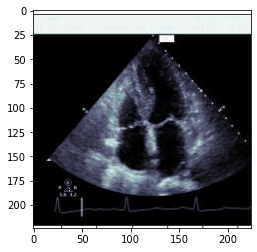

In [39]:
test = Image.open('E:/Jupyter/ECHO_CNN/data/train/yjy_a4c/645.jpg')
plt.imshow(test)

[0 1 2 3 4]


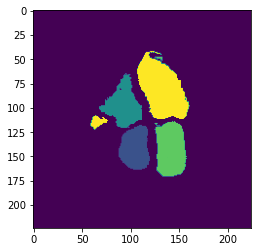

In [40]:
images = np.array(test)
test_part = images/127.5-1
test_part = tf.expand_dims(test_part, axis=0)
pred_part  = model.predict(test_part)
pred_part = tf.argmax(pred_part, axis=-1)
pred_part = tf.squeeze(pred_part)
plt.imshow(pred_part)
print(np.unique(pred_part))

[5.2370969e-34 6.0274933e-34 7.1153022e-34 ... 1.9630712e-01 1.9806883e-01
 2.0107602e-01]


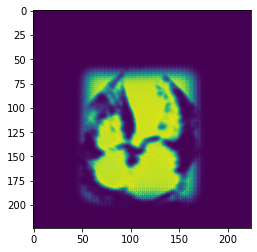

In [32]:
plt.imshow(pred_part[...,3])
print(np.unique(pred_part[...,3]))

[1.8261701e-33 2.5382892e-33 3.6793238e-33 ... 2.1722285e-01 2.1768269e-01
 2.1786004e-01]


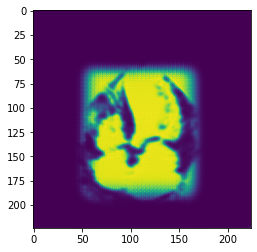

In [33]:
plt.imshow(pred_part[...,4])
print(np.unique(pred_part[...,4]))

In [40]:
prob = []
for i in range(5):
    p = pred_part[160,80,i]
    prob.append(p)

In [41]:
prob

[<tf.Tensor: shape=(), dtype=float32, numpy=0.37899038>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.11329809>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.11496201>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.1836945>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.20905504>]